<a href="https://colab.research.google.com/github/ulfiizza27/2141720052-PCVK-2023/blob/main/week-09/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Nama                                | No | NIM        |
| ----------------------------------- | -- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | 26 | 2141720052 |

# **Jobsheet 9 – Morfologi (Erosi, Dilasi, Opening, Closing, Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 1. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 *tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:


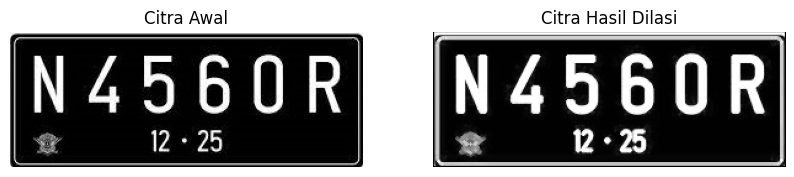

In [38]:
def dilasi(image):
    # Ambil dimensi citra
    height, width = image.shape

    # Buat SED (Structuring Element Dilasi) berbentuk cross 3x3
    sed = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

    # Buat citra hasil dilasi dengan inisialisasi citra yang semuanya hitam
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Ambil bagian citra yang sesuai dengan ukuran SED
            roi = image[i-1:i+2, j-1:j+2]

            # Lakukan operasi dilasi dengan mengalikan SED dengan ROI dan mengambil nilai maksimum
            dilated_image[i, j] = np.max(roi * sed)

    return dilated_image

# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Panggil fungsi dilasi
dilated_image = dilasi(image)

# Tampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

### 2. Buatlah program implementasi **operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5** dengan *menggunakan library morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:


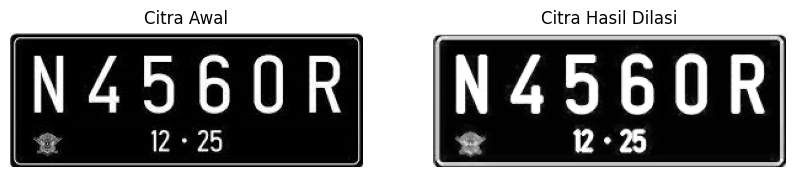

In [39]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element Dilasi (SED) berbentuk cross 3x3
sed = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Terapkan dilasi menggunakan library morphology dari OpenCV
dilated_image = cv2.dilate(image, sed, iterations=1)

# Tampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

### 3. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 **tanpa menggunakan library morphology** dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

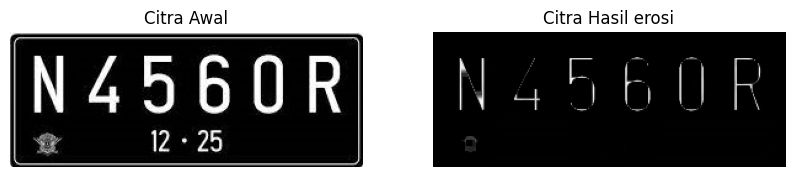

In [56]:
def erosi(image):
    # Ambil dimensi citra
    height, width = image.shape

    # Buat SED (Structuring Element erosi) berbentuk cross 3x3
    sed = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)

    # Buat citra hasil erosi dengan inisialisasi citra yang semuanya hitam
    eroted_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan erosi
    for i in range(2, height - 2):
        for j in range(2, width - 2):
            # Ambil bagian citra yang sesuai dengan ukuran SED
            roi = image[i-2:i+3, j-2:j+3]
            product = roi*sed

            # Lakukan operasi erosi dengan mengalikan SED dengan ROI dan mengambil nilai maksimum
            eroted_image[i, j] = np.min(roi)

    return eroted_image

# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Panggil fungsi erosi
eroted_image = erosi(image)

# Tampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroted_image, cmap='gray')
plt.title('Citra Hasil erosi')
plt.axis('off')

plt.show()

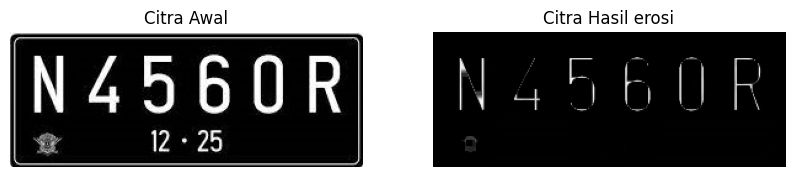

In [44]:
def erosi(image):
    # Ambil dimensi citra
    height, width = image.shape

    # Buat SED (Structuring Element erosi) berbentuk cross 3x3
    sed = np.ones((5, 5), dtype=np.uint8)

    # Buat citra hasil erosi dengan inisialisasi citra yang semuanya hitam
    eroted_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan erosi
    for i in range(2, height - 2):
        for j in range(2, width - 2):
            # Ambil bagian citra yang sesuai dengan ukuran SED
            roi = image[i-2:i+3, j-2:j+3]
            product = roi*sed

            # Lakukan operasi erosi dengan mengalikan SED dengan ROI dan mengambil nilai maksimum
            eroted_image[i, j] = np.min(roi)

    return eroted_image

# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Panggil fungsi erosi
eroted_image = erosi(image)

# Tampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroted_image, cmap='gray')
plt.title('Citra Hasil erosi')
plt.axis('off')

plt.show()

### 4. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

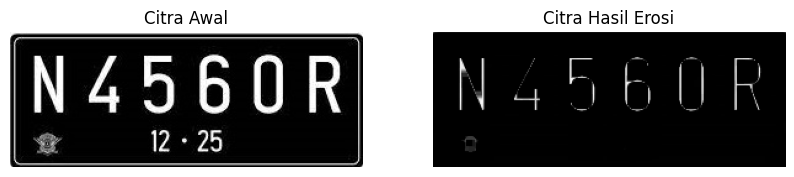

In [45]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element Erosi (SE) berbentuk square 5x5
se = np.ones((5, 5), dtype=np.uint8)

# Terapkan erosi menggunakan library morphology dari OpenCV
eroded_image = cv2.erode(image, se, iterations=1)

# Tampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

### 5. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 **tanpa dan dengan menggunakan library morphology** dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:
## **Operasi Opening Menggunakan tanpa Library Morphology**

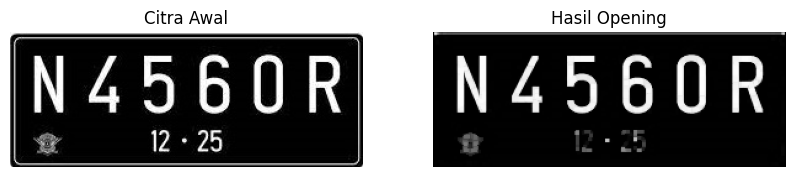

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def erosi(image):
    # Ambil dimensi citra
    height, width = image.shape[:2]

    # Buat Structuring Element Erosi (SE) berbentuk square 3x3
    se = np.ones((3, 3), dtype=np.uint8)

    # Buat citra hasil erosi dengan inisialisasi citra yang semuanya hitam
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan erosi
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Ambil bagian citra yang sesuai dengan ukuran SE
            roi = image[i-1:i+2, j-1:j+2]
            product = roi*se
            eroded_image[i,j] = np.min(roi)
    return eroded_image

def dilasi(image):
    # Ambil dimensi citra
    height, width = image.shape[:2]

    # Buat Structuring Element Dilasi (SE) berbentuk square 3x3
    se = np.ones((3, 3), dtype=np.uint8)

    # Buat citra hasil dilasi dengan inisialisasi citra yang semuanya hitam
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Ambil bagian citra yang sesuai dengan ukuran SE
            roi = image[i-1:i+2, j-1:j+2]
            dilated_image[i, j] = np.max(roi * se)

    return dilated_image

# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Panggil fungsi erosi
eroded_image = erosi(image)

# Panggil fungsi dilasi pada hasil erosi
opened_image = dilasi(eroded_image)

# Tampilkan citra asli dan hasil opening
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened_image, cmap='gray')
plt.title('Hasil Opening')
plt.axis('off')

plt.show()

## **Operasi Opening Menggunakan Library Morphology**

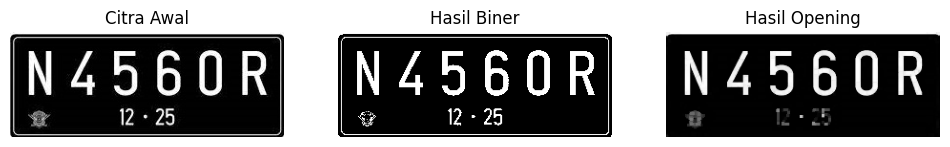

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3
se = np.ones((3, 3), dtype=np.uint8)

# Operasi Opening menggunakan library morphology
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, se)

# Thresholding citra hasil opening
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Tampilkan citra asli, hasil biner, dan hasil opening dalam urutan yang diinginkan
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Hasil Biner')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Hasil Opening')
plt.axis('off')

plt.show()

### 6. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 **tanpa dan dengan menggunakan library morphology** dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: operasi closing tanpa library morphology

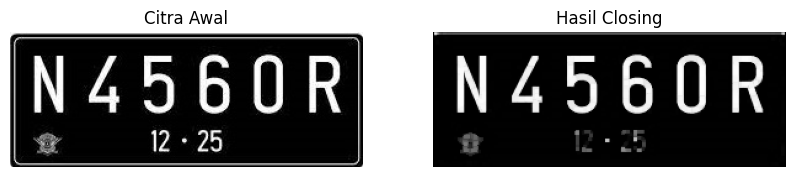

In [80]:
def dilasi(image):
    # Ambil dimensi citra
    height, width = image.shape[:2]

    # Buat Structuring Element Dilasi (SE) berbentuk square 3x3
    se = np.ones((3, 3), dtype=np.uint8)

    # Buat citra hasil dilasi dengan inisialisasi citra yang semuanya hitam
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Ambil bagian citra yang sesuai dengan ukuran SE
            roi = image[i-1:i+2, j-1:j+2]
            dilated_image[i, j] = np.max(roi * se)

    return dilated_image

def erosi(image):
    # Ambil dimensi citra
    height, width = image.shape[:2]

    # Buat Structuring Element Erosi (SE) berbentuk square 5x5
    se = np.ones((3, 3), dtype=np.uint8)

    # Buat citra hasil erosi dengan inisialisasi citra yang semuanya hitam
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan erosi
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Ambil bagian citra yang sesuai dengan ukuran SE
            roi = image[i-1:i+2, j-1:j+2]
            product = roi*se
            eroded_image[i,j] = np.min(roi)
    return eroded_image



# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Panggil fungsi dilasi
dilated_image = erosi(image)

# Panggil fungsi dilasi pada hasil erosi
closing_image = dilasi(dilated_image)
plt.figure(figsize=(10,8))
# Menampilkan citra awal dan hasil opening
plt.subplot(121),plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)),plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122),plt.imshow(closing_image, cmap='gray'),plt.title('Hasil Closing')
plt.axis('off')

plt.show()


## **operasi closing dengan library morphology**

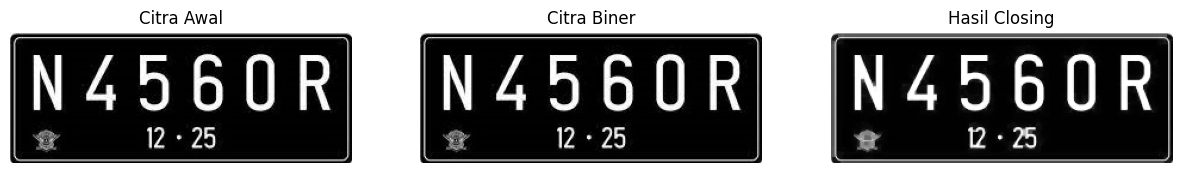

In [77]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3
se = np.ones((3, 3), dtype=np.uint8)

# Lakukan erosi dengan SE 3x3
dilated_image = cv2.dilate(image, se, iterations=1)

# Lakukan dilasi dengan SE 3x3 pada hasil erosi
closing_image = cv2.erode(dilated_image, se, iterations=1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(15,15))
# Menampilkan citra awal dan hasil opening
plt.subplot(131), plt.imshow(image_rgb), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(132), plt.imshow(image_rgb, cmap='binary'), plt.title('Citra Biner')
plt.axis('off')
plt.subplot(133), plt.imshow(closing_image, cmap='gray'), plt.title('Hasil Closing')
plt.axis('off')

plt.show()


### 7. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

## **Cross 3**

(-0.5, 286.5, 109.5, -0.5)

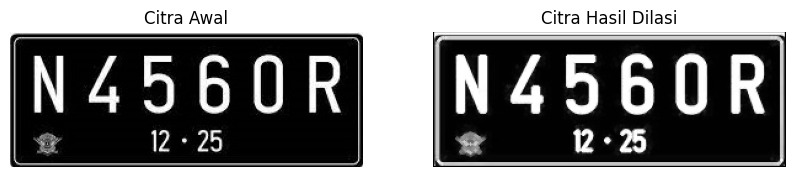

In [81]:
def dilasi(image):
    # Ambil dimensi citra
    height, width = image.shape[:2]

    # Buat SED (Structuring Element Dilasi) berbentuk cross 3x3
    sed = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

    # Buat citra hasil dilasi dengan inisialisasi citra yang semuanya hitam
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Ambil bagian citra yang sesuai dengan ukuran SED
            roi = image[i-1:i+2, j-1:j+2]

            # Lakukan operasi dilasi dengan mengalikan SED dengan ROI dan mengambil nilai maksimum
            dilated_image[i, j] = np.max(roi * sed)

    return dilated_image

# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Panggil fungsi dilasi
dilated_image = dilasi(image)
dilated_image_rgb = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)),plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122),plt.imshow(dilated_image_rgb),plt.title('Citra Hasil Dilasi')
plt.axis('off')

## **Cross 5**

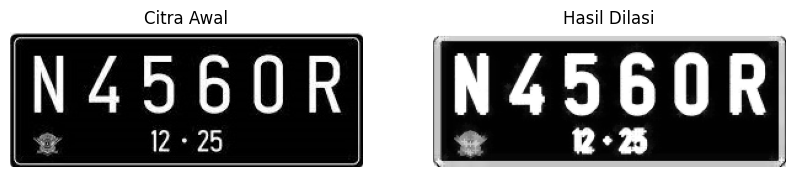

In [82]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk cross 5x5
se = np.array([[0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 1, 1, 1, 1],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0]], dtype=np.uint8)

# Lakukan dilasi dengan SE cross 5x5
dilated_image = cv2.dilate(image, se, iterations=1)
plt.figure(figsize=(10,8))
# Menampilkan citra awal dan hasil dilasi
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(dilated_image, cmap='gray'), plt.title('Hasil Dilasi')
plt.axis('off')

plt.show()

### 8.  Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

## **3 x 3**

(-0.5, 286.5, 109.5, -0.5)

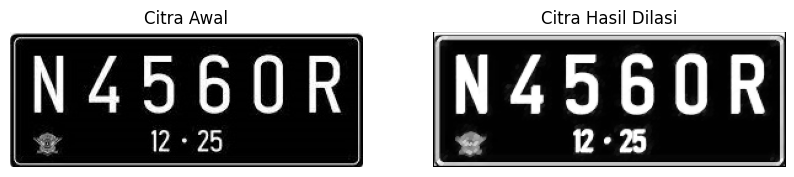

In [83]:
def dilasi(image):
    # Ambil dimensi citra
    height, width = image.shape[:2]

    # Buat SED (Structuring Element Dilasi) berbentuk cross 3x3
    sed = np.array([[0, 1, 1],
                    [1, 1, 1],
                    [1, 1, 0]], dtype=np.uint8)

    # Buat citra hasil dilasi dengan inisialisasi citra yang semuanya hitam
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Ambil bagian citra yang sesuai dengan ukuran SED
            roi = image[i-1:i+2, j-1:j+2]

            # Lakukan operasi dilasi dengan mengalikan SED dengan ROI dan mengambil nilai maksimum
            dilated_image[i, j] = np.max(roi * sed)

    return dilated_image

# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Panggil fungsi dilasi
dilated_image = dilasi(image)
dilated_image_rgb = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)),plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122),plt.imshow(dilated_image_rgb),plt.title('Citra Hasil Dilasi')
plt.axis('off')

## **5 x 5**

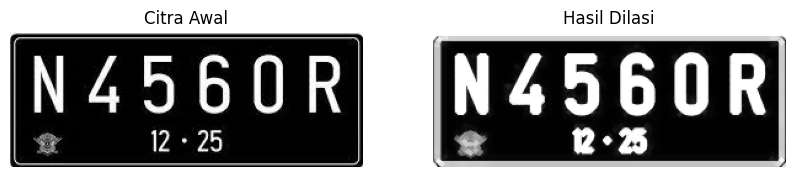

In [85]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk cross 5x5
se = np.array([[0, 0, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [1, 1, 1, 1, 1],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 0, 0]], dtype=np.uint8)

# Lakukan dilasi dengan SE cross 5x5
dilated_image = cv2.dilate(image, se, iterations=1)
plt.figure(figsize=(10,8))
# Menampilkan citra awal dan hasil dilasi
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(dilated_image, cmap='gray'), plt.title('Hasil Dilasi')
plt.axis('off')

plt.show()

### 9. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:

## **3 x 5**

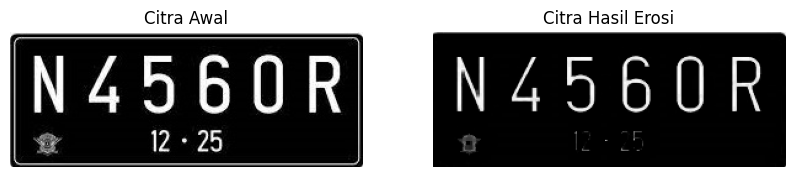

In [87]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk Rectangle 3x5
se = np.array([[0, 0, 1, 1, 1],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 1]], dtype=np.uint8)

# Lakukan erosi dengan SE Rectangle 3x5
eroded_image = cv2.erode(image, se, iterations=1)
plt.figure(figsize=(10,8))
# Menampilkan citra awal dan hasil erosi
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

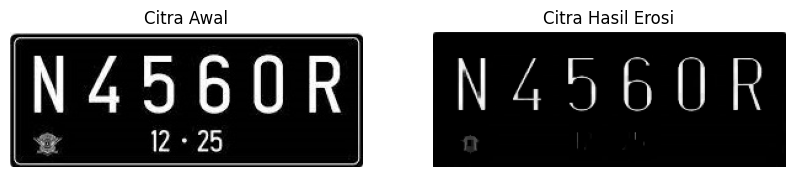

In [90]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk circular 3x3
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))

# Lakukan dilasi dengan SE circular 3x3
eroded_image = cv2.erode(image, se, iterations=1)
plt.figure(figsize=(10,8))
# Menampilkan citra awal dan hasil dilasi
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

## **5 x 7**

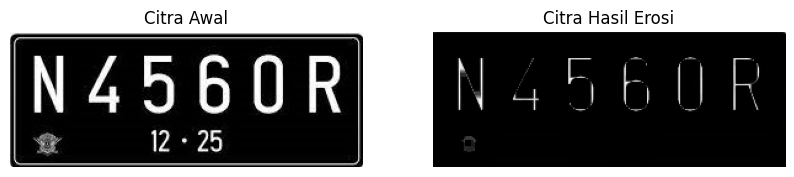

In [91]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk Rectangle 3x5
se = np.array([[0, 0, 1, 1, 1, 1, 1],
              [0, 0, 1, 1, 1, 1, 1],
              [0, 0, 1, 1, 1, 1, 1],
              [0, 0, 1, 1, 1, 1, 1],
              [0, 0, 1, 1, 1, 1, 1]], dtype=np.uint8)

# Lakukan erosi dengan SE Rectangle 3x5
eroded_image = cv2.erode(image, se, iterations=1)
plt.figure(figsize=(10,8))
# Menampilkan citra awal dan hasil erosi
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

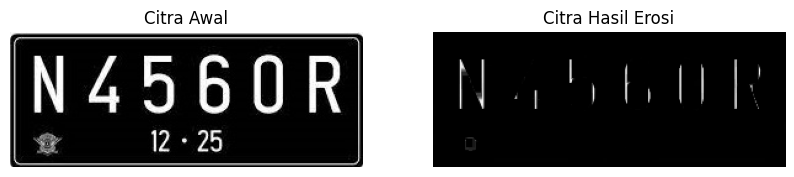

In [92]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk circular 3x3
se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Lakukan dilasi dengan SE circular 3x3
eroded_image = cv2.erode(image, se, iterations=1)
plt.figure(figsize=(10,8))
# Menampilkan citra awal dan hasil dilasi
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

### 10.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

## **Vertikal 3**

SE = Line Vertikal 3


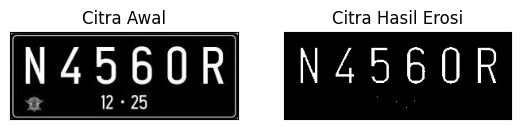

SE = Line Vertikal 5


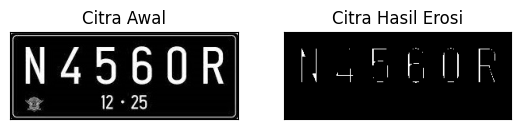

In [94]:
#Erosi Line Vertikal SE

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal

  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.figure(figsize=(10, 8))
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/img/plat.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.figure(figsize=(10, 8))
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()


### 11. TopHat

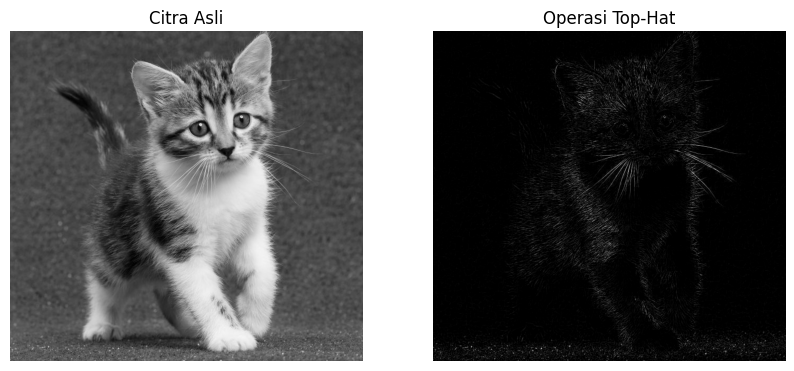

In [96]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3
se = np.ones((3, 3), dtype=np.uint8)

# Lakukan operasi opening pada citra
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, se)

# Hitung operasi top-hat
tophat_image = cv2.subtract(image, opened_image)
plt.figure(figsize=(10,15))
# Menampilkan citra asli dan hasil operasi top-hat
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Asli')
plt.axis('off')
plt.subplot(122), plt.imshow(tophat_image, cmap='gray'), plt.title('Operasi Top-Hat')
plt.axis('off')

plt.show()

### 12. BLACKHAT

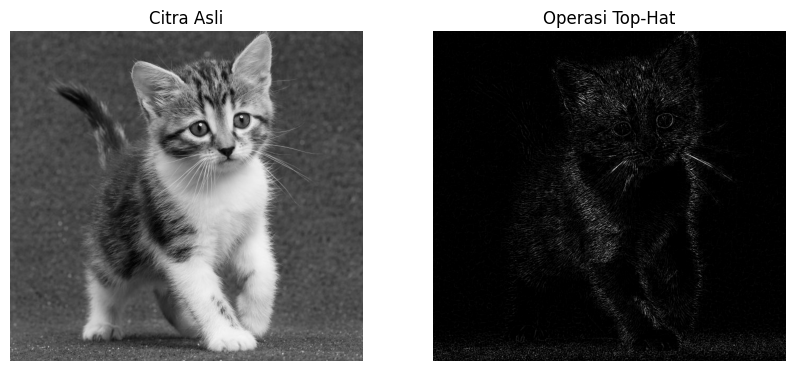

In [98]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3
se = np.ones((3, 3), dtype=np.uint8)

# Lakukan operasi opening pada citra
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se)

# Hitung operasi top-hat
blackhat_image = cv2.subtract(closed_image, image)

plt.figure(figsize=(10,15))
# Menampilkan citra asli dan hasil operasi top-hat
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)), plt.title('Citra Asli')
plt.axis('off')
plt.subplot(122), plt.imshow(blackhat_image, cmap='gray'), plt.title('Operasi Top-Hat')
plt.axis('off')

plt.show()

### 13. Skeleton

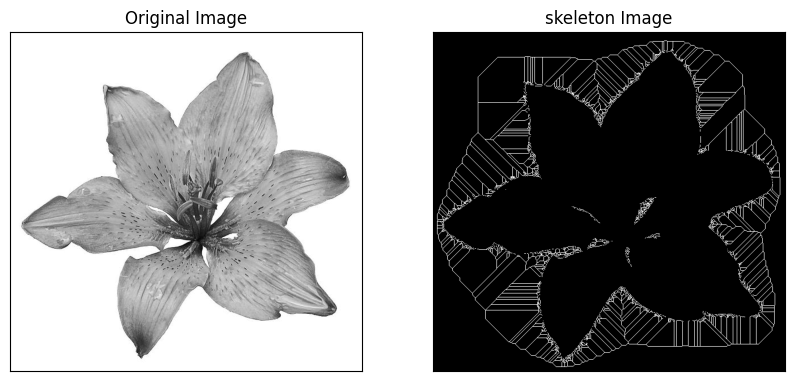

In [100]:
from skimage import filters
from skimage.morphology import skeletonize

# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/img/lily.jpg', cv2.IMREAD_GRAYSCALE)

binary = image > filters.threshold_triangle(image)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(10,15))

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

# plt.savefig("binary and bin_skeleton.png")
plt.show()